In [1]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import qtm.base_qtm, qtm.constant, qtm.qtm_nqubit, qtm.qtm_1qubit

In [2]:
# Init params
num_qubits = 4
num_layers = 3
thetas = np.zeros((num_layers*num_qubits*3))
for i in range(0, len(thetas)):
    thetas[i] = i
# theta = np.random.uniform(0, 2*np.pi)
theta = np.pi*3/4
# Init quantum tomography n qubit
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.qtm_nqubit.create_ghz_state(qc, theta)
# Reduce loss value in 100 steps
thetas, loss_values = qtm.base_qtm.fit(
    qc, num_steps = 10, thetas = thetas, 
    create_circuit_func = qtm.qtm_nqubit.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base_qtm.grad_l,
    loss_func = qtm.base_qtm.loss_basis,
    verbose = 1,
    num_layers = num_layers
)


Step: 100%|██████████| 10/10 [00:39<00:00,  3.94s/it]


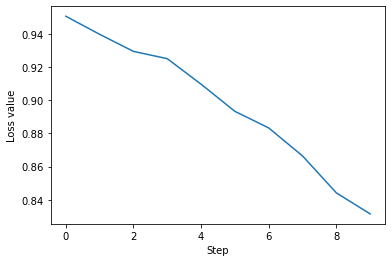

In [3]:
plt.show()
plt.plot(loss_values)
plt.xlabel("Step")
plt.ylabel("Loss value")
plt.show()

In [5]:
# Get statevector from circuit
psi = qiskit.quantum_info.Statevector.from_instruction(qc)
rho_psi = qiskit.quantum_info.DensityMatrix(psi)
psi_hat = qiskit.quantum_info.Statevector(qtm.base_qtm.get_u_hat(
    thetas = thetas, 
    create_circuit_func = qtm.qtm_nqubit.u_cluster_nlayer_nqubit, 
    num_qubits = qc.num_qubits,
    num_layers = num_layers
))
rho_psi_hat = qiskit.quantum_info.DensityMatrix(psi_hat)
# Calculate the metrics
trace, fidelity = qtm.base_qtm.get_metrics(psi, psi_hat)
print("Trace: ", trace)
print("Fidelity: ", fidelity)

Trace:  0.9092916816742052
Fidelity:  (0.1731886394369467-1.2812644575952575e-09j)


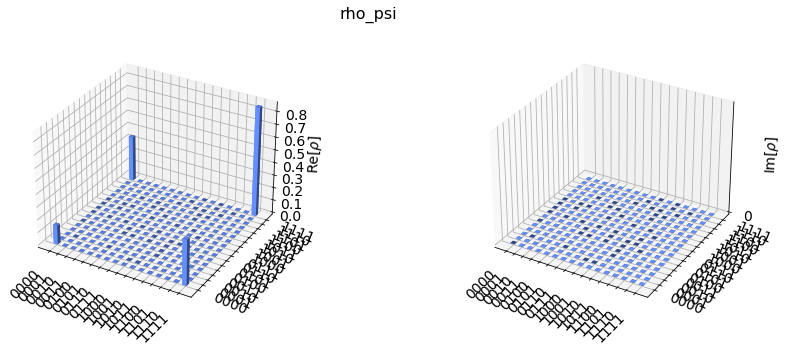

In [15]:
qiskit.visualization.plot_state_city(rho_psi, title = 'rho_psi')

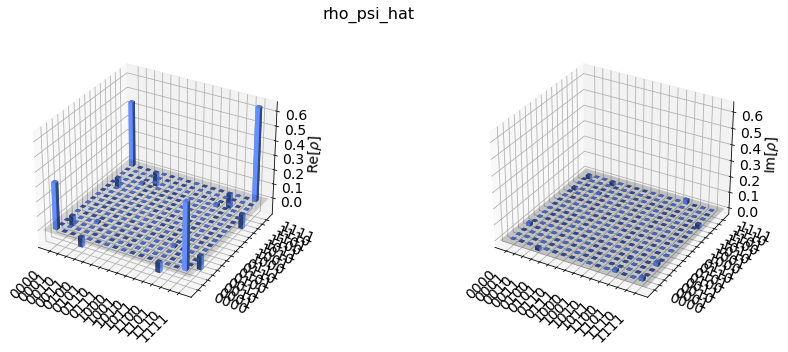

In [16]:
qiskit.visualization.plot_state_city(rho_psi_hat, title = 'rho_psi_hat')